In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np


url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation',
           'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

df = pd.read_csv(url, header=None, names=columns, na_values=' ?', skipinitialspace=True)
df 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [2]:
columns = ['fnlwgt','marital-status','relationship','race']
df.drop(columns=columns,inplace=True)
df

,age,workclass,education,education-num,occupation,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Adm-clerical,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Exec-managerial,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Handlers-cleaners,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Handlers-cleaners,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Prof-specialty,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Tech-support,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Machine-op-inspct,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Adm-clerical,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Adm-clerical,Male,0,0,20,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   occupation      32561 non-null  object
 5   sex             32561 non-null  object
 6   capital-gain    32561 non-null  int64 
 7   capital-loss    32561 non-null  int64 
 8   hours-per-week  32561 non-null  int64 
 9   native-country  32561 non-null  object
 10  income          32561 non-null  object
dtypes: int64(5), object(6)
memory usage: 2.7+ MB


In [4]:
df.isna().sum()

age               0
workclass         0
education         0
education-num     0
occupation        0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [5]:
for col in ['workclass', 'occupation', 'native-country']:
    df.dropna(subset=[col], inplace=True)
    
df['sex'] = df['sex'].map({'Male':2, 'Female':1})
df['income_numeric'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

le = LabelEncoder()
df['native-country_encoded'] = le.fit_transform(df['native-country'].astype(str))

print(np.unique(df['workclass']))
df['workclass'] = df['workclass'].replace('?', 'Unknown')
print(np.unique(df['occupation']))
df['occupation'] = df['occupation'].replace('?', 'Unknown')

df

['?' 'Federal-gov' 'Local-gov' 'Never-worked' 'Private' 'Self-emp-inc'
 'Self-emp-not-inc' 'State-gov' 'Without-pay']
['?' 'Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'
 'Priv-house-serv' 'Prof-specialty' 'Protective-serv' 'Sales'
 'Tech-support' 'Transport-moving']


,age,workclass,education,education-num,occupation,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_numeric,native-country_encoded
0,39,State-gov,Bachelors,13,Adm-clerical,2,2174,0,40,United-States,<=50K,0,39
1,50,Self-emp-not-inc,Bachelors,13,Exec-managerial,2,0,0,13,United-States,<=50K,0,39
2,38,Private,HS-grad,9,Handlers-cleaners,2,0,0,40,United-States,<=50K,0,39
3,53,Private,11th,7,Handlers-cleaners,2,0,0,40,United-States,<=50K,0,39
4,28,Private,Bachelors,13,Prof-specialty,1,0,0,40,Cuba,<=50K,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Tech-support,1,0,0,38,United-States,<=50K,0,39
32557,40,Private,HS-grad,9,Machine-op-inspct,2,0,0,40,United-States,>50K,1,39
32558,58,Private,HS-grad,9,Adm-clerical,1,0,0,40,United-States,<=50K,0,39
32559,22,Private,HS-grad,9,Adm-clerical,2,0,0,20,United-States,<=50K,0,39


In [48]:

df['workclass_encoded'] = le.fit_transform(df['workclass'].astype(str))
df

,age,workclass,education,education-num,occupation,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_numeric,native-country_encoded,occupation_encoded,workclass_encoded,age_bin
0,39,State-gov,Bachelors,13,Adm-clerical,2,126,0,40,United-States,<=50K,0,39,0,6,"(35, 45]"
1,50,Self-emp-not-inc,Bachelors,13,Exec-managerial,2,0,0,13,United-States,<=50K,0,39,3,5,"(45, 55]"
2,38,Private,HS-grad,9,Handlers-cleaners,2,0,0,40,United-States,<=50K,0,39,5,3,"(35, 45]"
3,53,Private,11th,7,Handlers-cleaners,2,0,0,40,United-States,<=50K,0,39,5,3,"(45, 55]"
4,28,Private,Bachelors,13,Prof-specialty,1,0,0,40,Cuba,<=50K,0,5,9,3,"(25, 35]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Tech-support,1,0,0,38,United-States,<=50K,0,39,12,3,"(25, 35]"
32557,40,Private,HS-grad,9,Machine-op-inspct,2,0,0,40,United-States,>50K,1,39,6,3,"(35, 45]"
32558,58,Private,HS-grad,9,Adm-clerical,1,0,0,40,United-States,<=50K,0,39,0,3,"(55, 65]"
32559,22,Private,HS-grad,9,Adm-clerical,2,0,0,20,United-States,<=50K,0,39,0,3,"(15, 25]"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32561 non-null  int64 
 1   workclass               32561 non-null  object
 2   education               32561 non-null  object
 3   education-num           32561 non-null  int64 
 4   occupation              32561 non-null  object
 5   sex                     32561 non-null  int64 
 6   capital-gain            32561 non-null  int64 
 7   capital-loss            32561 non-null  int64 
 8   hours-per-week          32561 non-null  int64 
 9   native-country          32561 non-null  object
 10  income                  32561 non-null  object
 11  income_numeric          32561 non-null  int64 
 12  native-country_encoded  32561 non-null  int64 
 13  occupation_encoded      32561 non-null  int64 
 14  workclass_encoded       32561 non-null  int64 
dtypes:

In [8]:
for col in ['sex','income_numeric','native-country_encoded','workclass_encoded','occupation_encoded','hours-per-week','capital-gain','capital-loss','education-num','age']:
    df[col] = df[col].astype(np.uint8)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32561 non-null  uint8 
 1   workclass               32561 non-null  object
 2   education               32561 non-null  object
 3   education-num           32561 non-null  uint8 
 4   occupation              32561 non-null  object
 5   sex                     32561 non-null  uint8 
 6   capital-gain            32561 non-null  uint8 
 7   capital-loss            32561 non-null  uint8 
 8   hours-per-week          32561 non-null  uint8 
 9   native-country          32561 non-null  object
 10  income                  32561 non-null  object
 11  income_numeric          32561 non-null  uint8 
 12  native-country_encoded  32561 non-null  uint8 
 13  occupation_encoded      32561 non-null  uint8 
 14  workclass_encoded       32561 non-null  uint8 
dtypes:

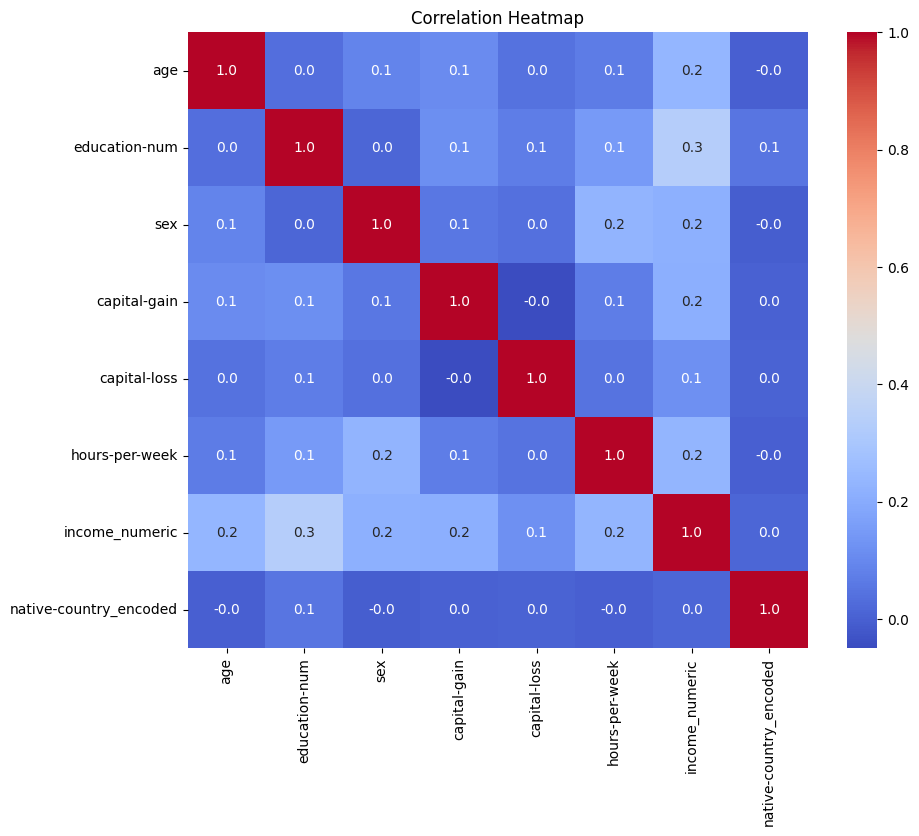

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# numeric_cols = df.select_dtypes(include='uint8').columns
# corr = df[numeric_cols].corr()
# print(corr['income_numeric'].sort_values(ascending=False))


numeric_cols = df.select_dtypes(include='uint8').columns
corr = df[numeric_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,fmt=".1f",cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

هرچه سن بالا تر میزان درامد بیشتر*
هرچه تحصیلات بالاتر میزان درامد بیشتر*
مردان درامد بالاتری نسبت به زنان دارند چون همبستگی مثبت است و با افزایش یکی دیگری نیز افزایش پیدا میکنه پس از 1 به 2 افزایش پیدا کرده*
درآمد بالاتر با سود سرمایه‌ای (capital-gain) و ساعات کاری بیشتر هم کمی مرتبط است
native-country, occupation, workclass همبستگی خاصی ندارند و با درامد ارتباطی ندارند

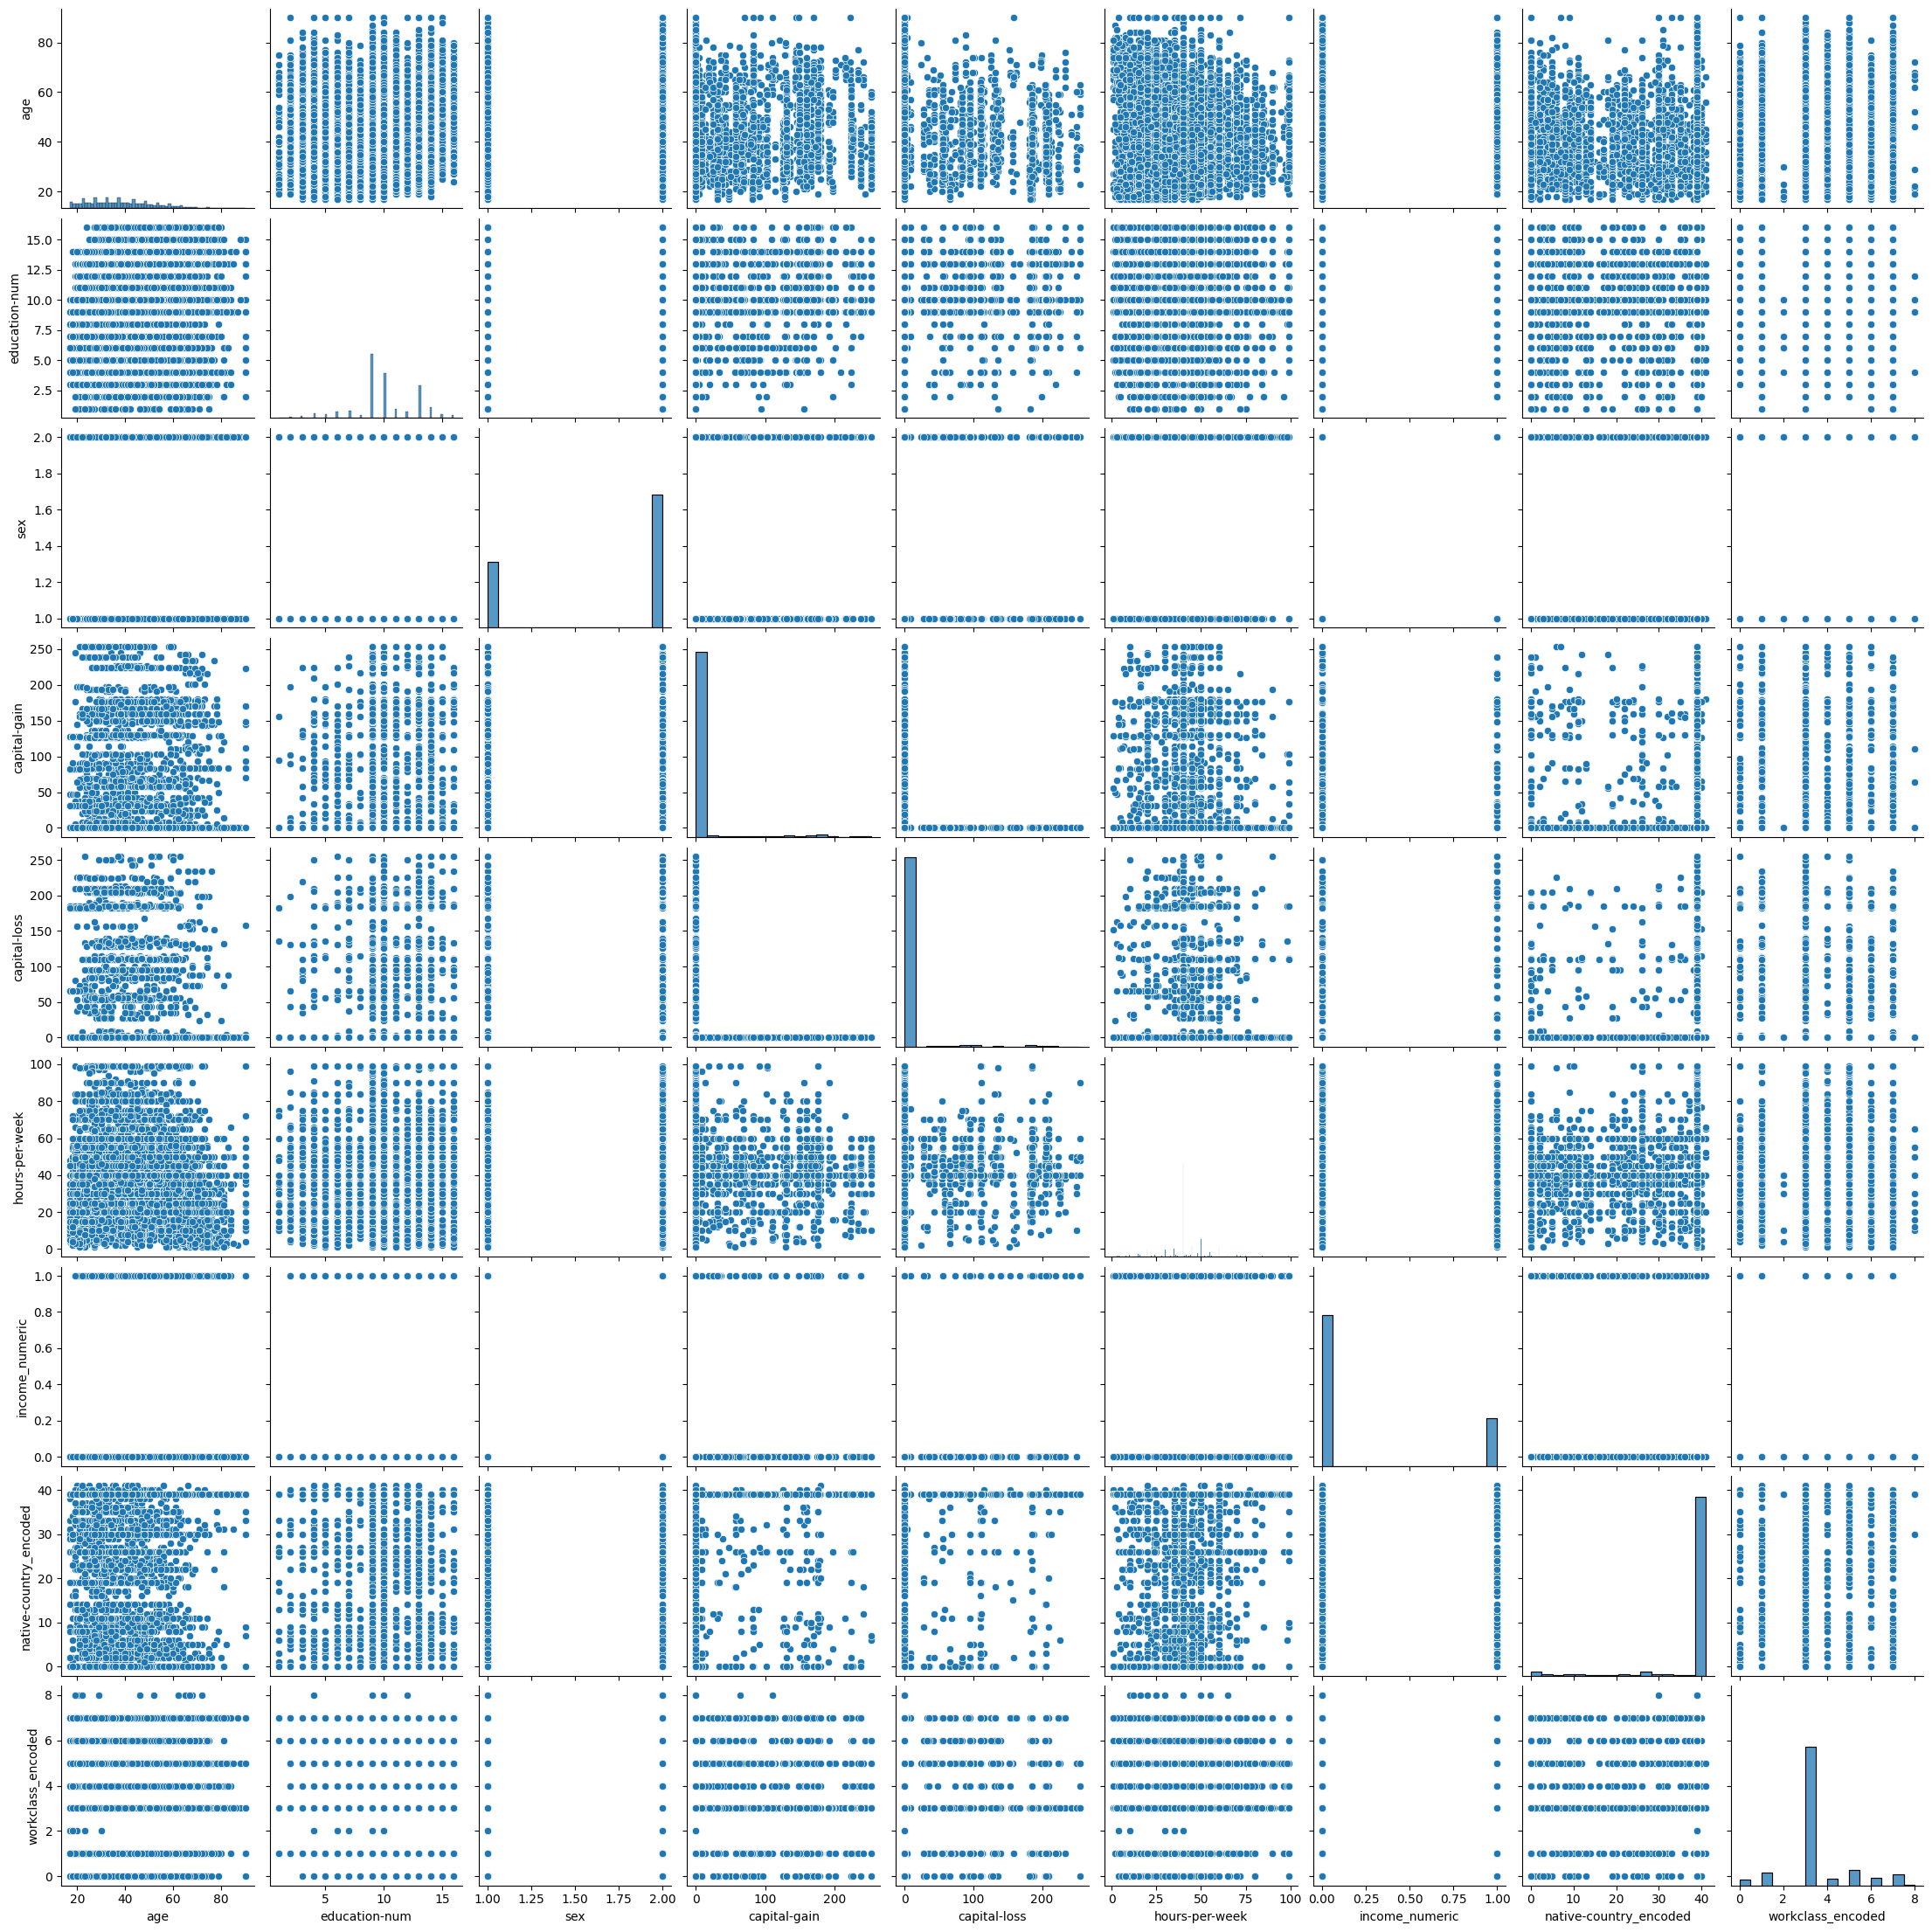

In [51]:
sns.pairplot(df)


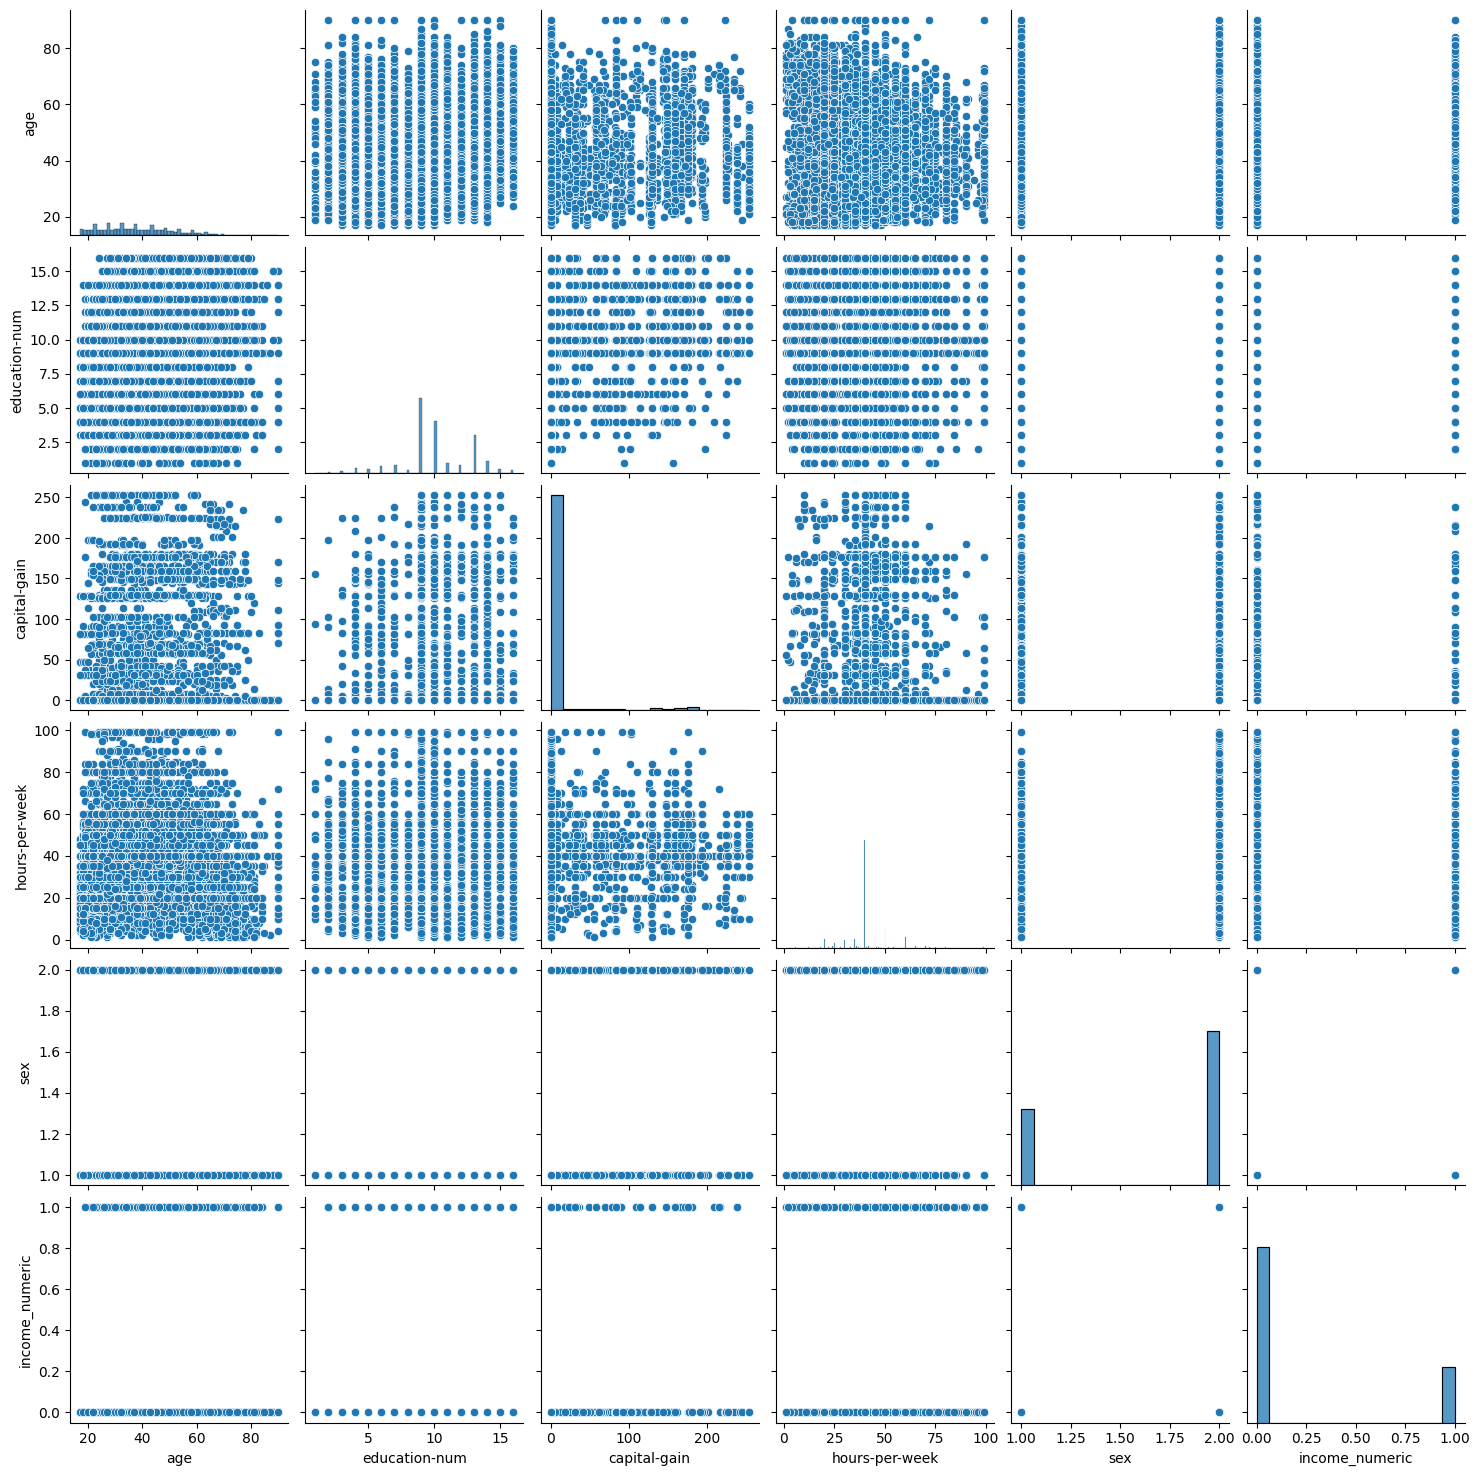

In [52]:
selected_cols = ['age', 'education-num', 'capital-gain', 'hours-per-week', 'sex', 'income_numeric']
income_data = df[selected_cols]
sns.pairplot(income_data)

    age_bin  income_numeric
0  (15, 25]        0.017782
1  (25, 35]        0.186869
2  (35, 45]        0.346360
3  (45, 55]        0.398339
4  (55, 65]        0.314910
5  (65, 75]        0.210469
6  (75, 85]        0.165803
7  (85, 95]        0.166667


C:\Users\taheri\AppData\Local\Temp\ipykernel_9196\3333629202.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


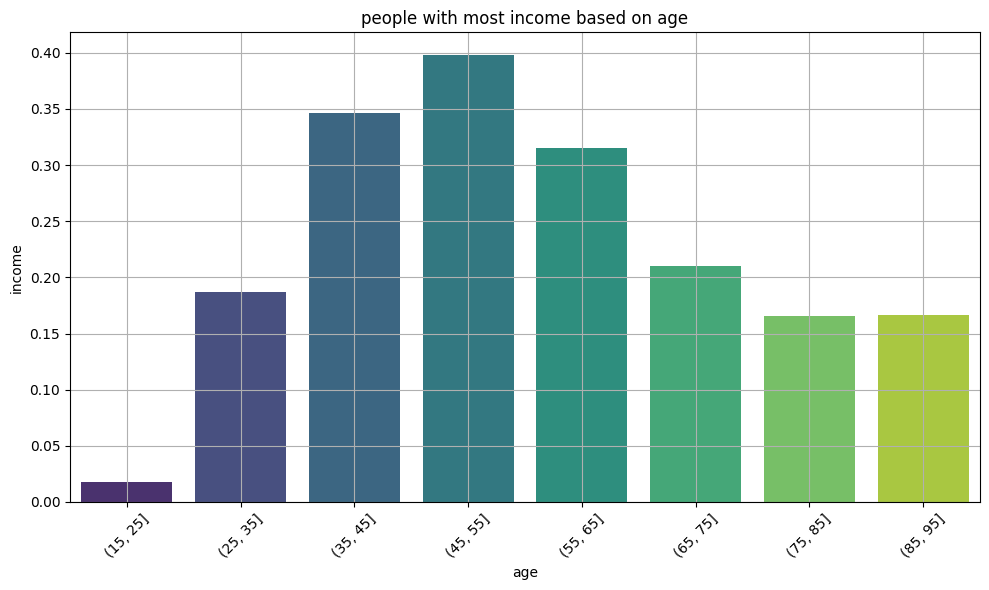

In [22]:
df['age_bin'] = pd.cut(df['age'], bins=[15, 25, 35, 45, 55, 65, 75,85,95])

#از میانگین استفاده میکنیم تا درصد افرادی رو به دست بیاریم که درامد 1 دارند
income_by_age = df.groupby('age_bin', observed=True)['income_numeric'].mean().reset_index()
print(income_by_age)

plt.figure(figsize=(10,6))
sns.barplot(
    x='age_bin', 
    y='income_numeric', 
    data=income_by_age, 
    palette='viridis', 
    legend=False  
)

plt.title('people with most income based on age')
plt.ylabel('income')
plt.xlabel('age')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


 بر اساس این نمودار افراد در بازه سنی 45 تا 55 بیشترین درامد را دارند


   sex  income_numeric
0    1        0.109461
1    2        0.305737


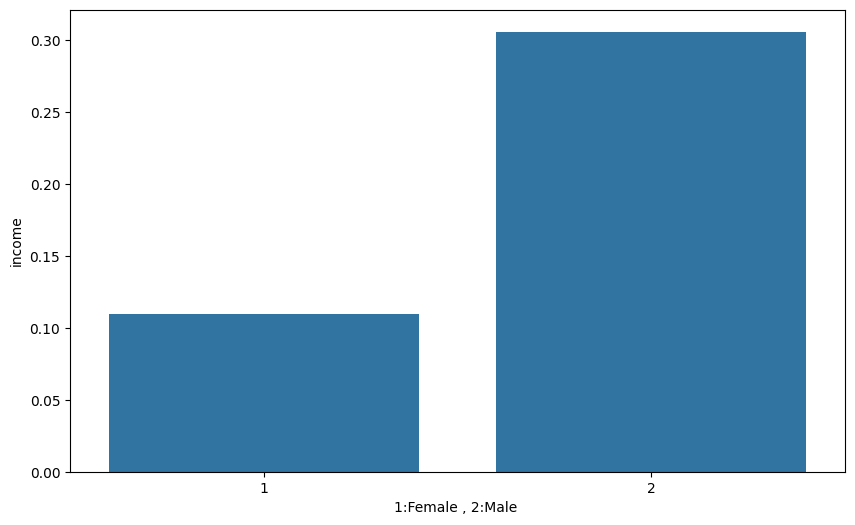

In [30]:
# df['sex_bin'] = pd.cut(df['sex'])

sex_income = df.groupby('sex', observed=True)['income_numeric'].mean().reset_index()
print(sex_income)
plt.figure(figsize=(10,6))
sns.barplot(x='sex',y='income_numeric',data=sex_income)
plt.xlabel('1:Female , 2:Male ')
plt.ylabel('income')
plt.show()


    sex   age_bin  income_numeric
0     1  (15, 25]        0.011343
1     1  (25, 35]        0.111965
2     1  (35, 45]        0.181132
3     1  (45, 55]        0.169659
4     1  (55, 65]        0.129652
5     1  (65, 75]        0.077670
6     1  (75, 85]        0.016949
7     1  (85, 95]        0.125000
8     2  (15, 25]        0.022841
9     2  (25, 35]        0.222280
10    2  (35, 45]        0.416430
11    2  (45, 55]        0.492480
12    2  (55, 65]        0.388465
13    2  (65, 75]        0.277961
14    2  (75, 85]        0.231343
15    2  (85, 95]        0.187500


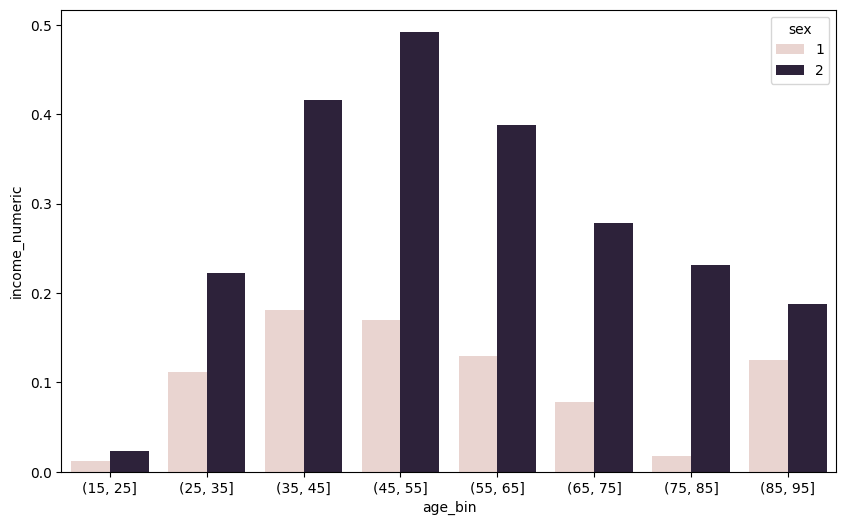

In [37]:
income_age_sex = df.groupby(['sex','age_bin'], observed=True)['income_numeric'].mean().reset_index()
print(income_age_sex)
plt.figure(figsize=(10,6))
sns.barplot(data=income_age_sex, x='age_bin', y='income_numeric', hue='sex')
plt.show()


طبق این نمودار در مردان در بازه سنی 45تا55 بیشترین درامد و در زنان بازه سنی 35 تا 45 بیشترین دراومد وجود دارد

    education-num     education  income_numeric
15             16     Doctorate        0.740920
14             15   Prof-school        0.734375
13             14       Masters        0.556587
12             13     Bachelors        0.414753
10             11     Assoc-voc        0.261216
11             12    Assoc-acdm        0.248360
9              10  Some-college        0.190235
8               9       HS-grad        0.159509
7               8          12th        0.076212
5               6          10th        0.066452
3               4       7th-8th        0.061920
4               5           9th        0.052529
6               7          11th        0.051064
2               3       5th-6th        0.048048
1               2       1st-4th        0.035714
0               1     Preschool        0.000000


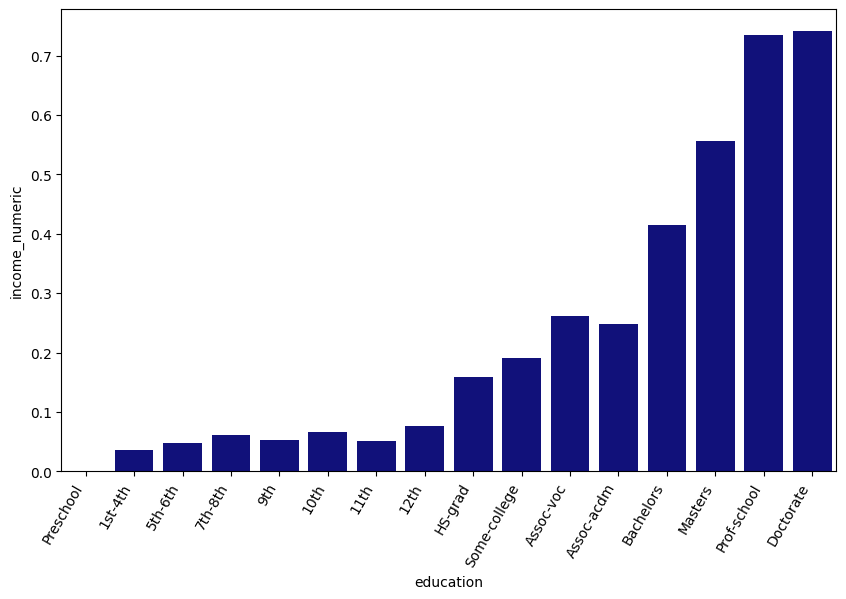

In [61]:
# columns_group = ['education-num','capital-gain','hours-per-week']
# for col in columns_group:
#     income_by_col = df.groupby(col, observed=True)['income_numeric'].mean().reset_index()
#     print(income_by_col.sort_values('income_numeric', ascending=False))
#     
#     
#     plt.figure(figsize=(10,5))
#     sns.barplot(data=income_by_col, x=col, y='income_numeric', palette='viridis')
#     plt.title(col)
#     plt.ylabel('income')
#     plt.xlabel(col)
#     plt.xticks(rotation=45)
#     plt.ylim(0, 1)
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()
income_by_edu_num = df.groupby(['education-num','education'], observed=True)['income_numeric'].mean().reset_index()
print(income_by_edu_num.sort_values('income_numeric', ascending=False))
plt.figure(figsize=(10,6))
sns.barplot(data=income_by_edu_num, x='education', y='income_numeric',color='darkblue')
plt.xticks(rotation=60, ha='right', fontsize=10)
plt.show()

.کسانی که دکتری دارند بالاترین درامد را دارند

In [53]:
# df.drop(columns=['occupation_encoded'], inplace=True)
df

,age,workclass,education,education-num,occupation,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_numeric,native-country_encoded,workclass_encoded,age_bin
0,39,State-gov,Bachelors,13,Adm-clerical,2,126,0,40,United-States,<=50K,0,39,6,"(35, 45]"
1,50,Self-emp-not-inc,Bachelors,13,Exec-managerial,2,0,0,13,United-States,<=50K,0,39,5,"(45, 55]"
2,38,Private,HS-grad,9,Handlers-cleaners,2,0,0,40,United-States,<=50K,0,39,3,"(35, 45]"
3,53,Private,11th,7,Handlers-cleaners,2,0,0,40,United-States,<=50K,0,39,3,"(45, 55]"
4,28,Private,Bachelors,13,Prof-specialty,1,0,0,40,Cuba,<=50K,0,5,3,"(25, 35]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Tech-support,1,0,0,38,United-States,<=50K,0,39,3,"(25, 35]"
32557,40,Private,HS-grad,9,Machine-op-inspct,2,0,0,40,United-States,>50K,1,39,3,"(35, 45]"
32558,58,Private,HS-grad,9,Adm-clerical,1,0,0,40,United-States,<=50K,0,39,3,"(55, 65]"
32559,22,Private,HS-grad,9,Adm-clerical,2,0,0,20,United-States,<=50K,0,39,3,"(15, 25]"


           occupation  income_numeric
3     Exec-managerial        0.484014
9      Prof-specialty        0.449034
10    Protective-serv        0.325116
12       Tech-support        0.304957
11              Sales        0.269315
2        Craft-repair        0.226641
13   Transport-moving        0.200376
0        Adm-clerical        0.134483
6   Machine-op-inspct        0.124875
4     Farming-fishing        0.115694
1        Armed-Forces        0.111111
14            Unknown        0.103635
5   Handlers-cleaners        0.062774
7       Other-service        0.041578
8     Priv-house-serv        0.006711


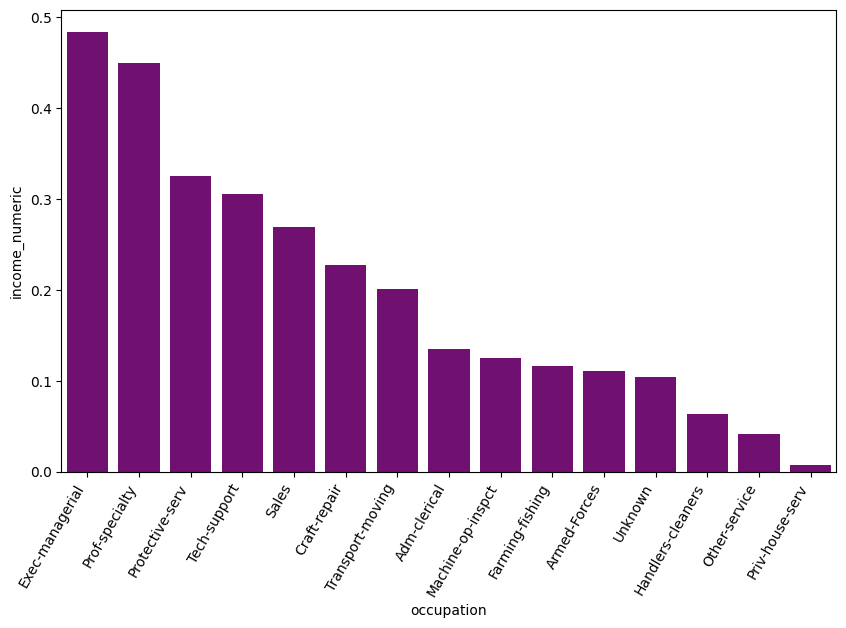

In [59]:
income_occupation = df.groupby('occupation',observed=True)['income_numeric'].mean().reset_index()
income_occupation = income_occupation.sort_values('income_numeric', ascending=False)
print(income_occupation)
plt.figure(figsize=(10,6))
sns.barplot(data=income_occupation, x='occupation', y='income_numeric',color='purple')
plt.xticks(rotation=60, ha='right', fontsize=10)
plt.show()

C:\Users\taheri\AppData\Local\Temp\ipykernel_9196\16042514.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=income_by_col, x=col, y='income_numeric', palette='viridis')


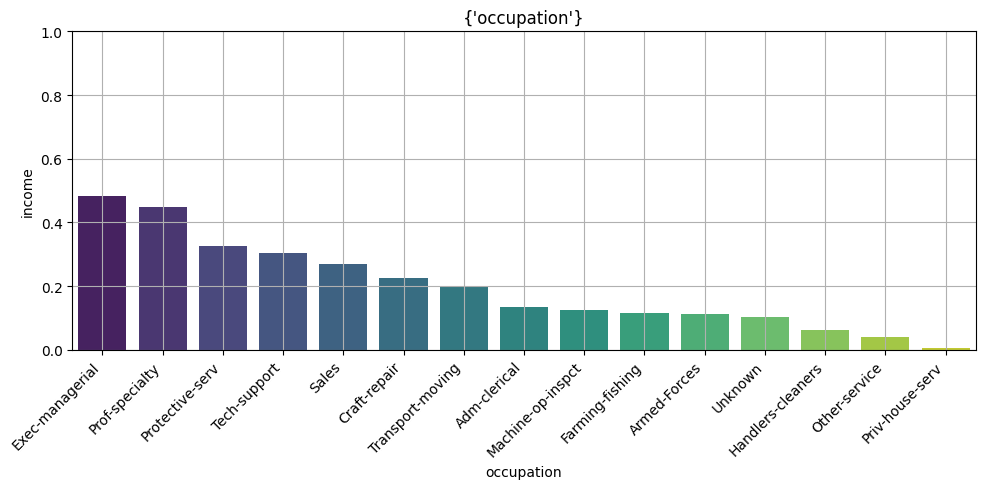

C:\Users\taheri\AppData\Local\Temp\ipykernel_9196\16042514.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=income_by_col, x=col, y='income_numeric', palette='viridis')


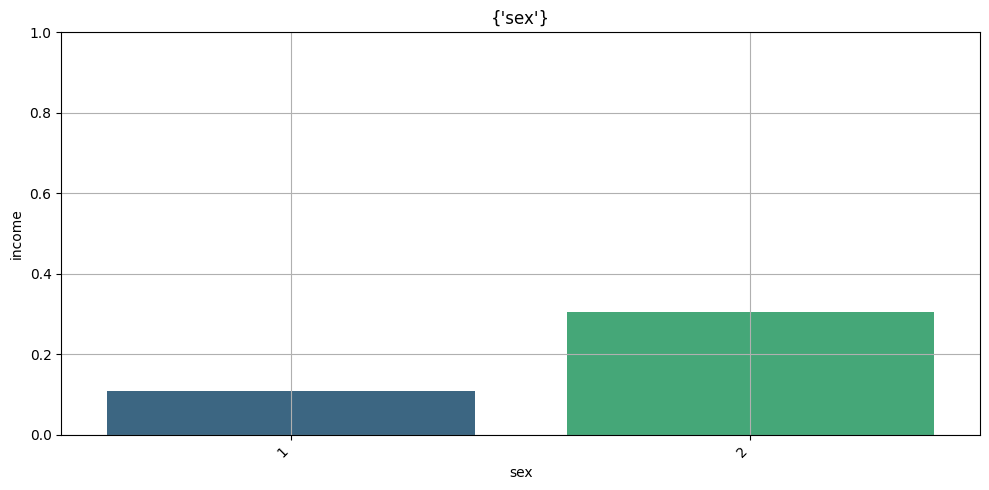

C:\Users\taheri\AppData\Local\Temp\ipykernel_9196\16042514.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=income_by_col, x=col, y='income_numeric', palette='viridis')


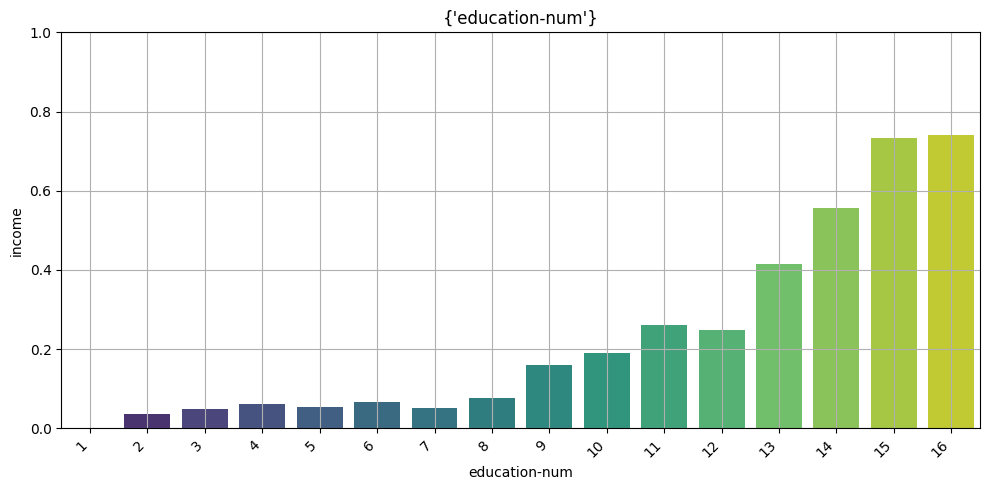

In [65]:
columns_to_check = ['occupation', 'sex','education-num']
for col in columns_to_check:
    plt.figure(figsize=(10, 5))
    
    income_by_col = df.groupby(col, observed=True)['income_numeric'].mean().reset_index()

    if not np.issubdtype(df[col].dtype, np.number):
        income_by_col = income_by_col.sort_values('income_numeric', ascending=False)

    sns.barplot(data=income_by_col, x=col, y='income_numeric', palette='viridis')

    plt.title(col)
    plt.ylabel('income')
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)
    plt.grid(True)
    plt.tight_layout()
    plt.show()